<a href="https://colab.research.google.com/github/Ckck12/NLP-Basic/blob/main/_8_%EC%88%9C%ED%99%98_%EC%8B%A0%EA%B2%BD%EB%A7%9D(Recurrent_Neural_Network).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 순환 신경망 (Recurrent Neural Network, RNN)

- **순서가 있는 데이터**를 입력으로 받음

- 변화하는 입력에 대한 출력을 얻음

- 시계열(날씨, 주가 등), 자연어와 같이 **시간의 흐름에 따라 변화하고, 그 변화가 의미를 갖는 데이터** 

## Feed Forward Network vs Recurrent Network

- Feed Forward Net (앞먹임 구조)
  - 일반적인 구조의 신경망

  - 입력 → 은닉 → 출력층 으로 이어지는 단방향 구조

  - 이전 스텝의 출력의 영향을 받지 않음

- Recurrent Net (되먹임 구조)
  - 이전 층(Layer), 또는 스텝의 출력이 다시 입력으로 연결되는 신경망 구조

  - 각 스텝마다 이전 상태를 기억 시스템(Memory System)  

  - 현재 상태가 이전 상태에 종속

  <br>

  <img src="https://www.researchgate.net/profile/Engin_Pekel/publication/315111480/figure/fig1/AS:472548166115333@1489675670530/Feed-forward-and-recurrent-ANN-architecture.png">

  <sub>출처: https://www.researchgate.net/figure/Feed-forward-and-recurrent-ANN-architecture_fig1_315111480</sub>



## 순환 신경망 구조

<img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-unrolled.png" width="700">

<br>

- 입력 $x_t$에서 $t$는 시각을 뜻함

- $X_0$에 대한 출력 $Y_0$이 다음 레이어에 전달

- 각각의 입력에 대해 출력은 해당 레이어대로 출력값을 반환

## 순환 신경망의 다양한 구조

<img src="https://static.packt-cdn.com/products/9781789346640/graphics/2d4a64ef-9cf9-4b4a-9049-cb9de7a07f89.png">
  
  <sub>출처: https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781789346640/11/ch11lvl1sec80/introduction</sub>

- one to one
  - RNN

- one to many
  - Image Captioning 

  - 이미지에 대한 설명 생성

- many to one
  - Sentiment Classification

  - 문장의 긍정/부정을 판단하는 감정 분석

- many to many
  - Machine Translation

  - 하나의 언어를 다른 언어로 번역하는 기계 번역

- many to many
  - Video Classification(Frame Level)




## 두 가지 정보(현재 입력, 이전 시각의 출력)을 처리하는 수식
$\qquad h_t = tanh ( \ h_{t-1} W_h \ + \ x_t W_x + b) $

- $W_x$ : 입력 $x$를 출력 $h$로 변환하기 위한 가중치

- $W_h$ : 다음 시각의 출력으로 변환하기 위한 가중치

- $h$는 '상태'를 기억

- $h_t \ $를 은닉 상태(hidden state) 또는 은닉 상태 벡터(hidden state vector)라고도 불림

  <sub>출처: https://colah.github.io/posts/2015-08-Understanding-LSTMs/</sub>

## 순환 신경망 레이어 (RNN Layer)

- 입력: `(timesteps, input_features)`

- 출력: `(timesteps, output_features)`

In [19]:
import numpy as np

In [20]:
timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

inputs.shape, state_t.shape
print('w',W.shape,"u",U.shape,"b",b.shape)


w (64, 32) u (64, 64) b (64,)


In [21]:
succesive_outputs = []

for input_t in inputs:
  output_t = np.tanh(np.dot(W,input_t) + np.dot(U, state_t)+  b)
  succesive_outputs.append(output_t)
  state_t = output_t

final_output_sequence = np.stack(succesive_outputs,axis=0)

## 케라스의 순환층
- `SimpleRNN` layer

- 입력: `(batch_size, timesteps, input_features)`

- 출력
  - `return_sequences`로 결정할 수 있음
  
  - 3D 텐서
    - 타임스텝의 출력을 모은 전체 시퀀스를 반환

    - `(batch_size, timesteps, output_features)`

  - 2D 텐서
    - 입력 시퀀스에 대한 마지막 출력만 반환

    - `(batch_size, output_features)`


In [3]:
from tensorflow.keras.layers import SimpleRNN, Embedding
from tensorflow.keras.models import Sequential

In [4]:
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [5]:
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


- 네트워크의 표현력을 증가시키기 위해 여러 개의 순환층을 차례대로 쌓는 것이 유용할 때가 있음

  - 이런 설정에서는 중간층들이 전체 출력 시퀀스를 반환하도록 설정

## IMDB 데이터 적용

### 데이터 로드

In [2]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

In [6]:
num_words = 10000
max_len = 500
batch_size = 32

(input_train, y_train), (input_test,y_test) = imdb.load_data(num_words = num_words)
print(len(input_train), len(input_test))

input_train = sequence.pad_sequences(input_train, maxlen=max_len)

17464789/17464789 [==============================] - 2s 0us/step
25000 25000


### 모델 구성

In [7]:
from tensorflow.keras.layers import Dense

In [8]:
model = Sequential()

model.add(Embedding(num_words,32))
model.add(SimpleRNN(32))
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer = "adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [9]:
hist = model.fit(input_train, y_train,
                 epochs = 10,
                 batch_size =128,
                 validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 104s 629ms/step - loss: 0.6669 - accuracy: 0.5763 - val_loss: 0.6125 - val_accuracy: 0.6760
Epoch 2/10
157/157 [==============================] - 93s 595ms/step - loss: 0.4161 - accuracy: 0.8210 - val_loss: 0.3773 - val_accuracy: 0.8412
Epoch 3/10
157/157 [==============================] - 89s 565ms/step - loss: 0.2584 - accuracy: 0.8985 - val_loss: 0.4067 - val_accuracy: 0.8328
Epoch 4/10
157/157 [==============================] - 85s 543ms/step - loss: 0.1603 - accuracy: 0.9419 - val_loss: 0.3924 - val_accuracy: 0.8448
Epoch 5/10
157/157 [==============================] - 84s 539ms/step - loss: 0.0849 - accuracy: 0.9754 - val_loss: 0.4820 - val_accuracy: 0.8354
Epoch 6/10
157/157 [==============================] - 83s 528ms/step - loss: 0.0531 - accuracy: 0.9846 - val_loss: 0.5166 - val_accuracy: 0.8374
Epoch 7/10
157/157 [==============================] - 80s 507ms/step - loss: 0.2080 - accuracy: 0.9116 - val_loss: 0.5119 - val_a

In [14]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

<ipython-input-14-60d85d81d40e>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


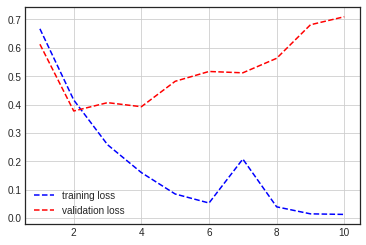

In [18]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

epochs = range(1,len(loss) +1)

plt.plot(epochs, loss, 'b--', label = 'training loss')

plt.plot(epochs, val_loss, 'r--', label = 'validation loss')
plt.grid()
plt.legend()

ValueError: ignored

### 모델 학습

### 시각화

- 전체 시퀀스가 아니라 순서대로 500개의 단어만 입력했기 때문에 성능이 낮게 나옴

- SimpleRNN은 긴 시퀀스를 처리하는데 적합하지 않음

- SimpleRNN은 실전에 사용하기엔 너무 단순

- SimpleRNN은 이론적으로 시간 $t$ 에서 이전의 모든 타임스텝의 정보를 유지할 수 있지만, 실제로는 긴 시간에 걸친 의존성은 학습할 수 없음

- 그래디언트 소실 문제(vanishing gradient problem)
  - 이를 방지하기 위해 LSTM, GRU 같은 레이어 등장



# LSTM(Long Short-Term Memory)
- 장단기 메모리 알고리즘

- 나중을 위해 정보를 저장함으로써 오래된 시그널이 점차 소실되는 것을 막아줌

  <img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png">

  <sub>출처: https://colah.github.io/posts/2015-08-Understanding-LSTMs/</sub>

## IMDB 데이터

### 데이터 로드

In [20]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [30]:
num_words = 10000
max_len = 500


(x_train, y_train), (x_test,y_test) = imdb.load_data(num_words = num_words)
print(len(x_train), len(x_test))

pad_x_train = sequence.pad_sequences(x_train, maxlen=max_len)
pad_x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print(x_train.shape)
print(x_test.shape)

25000 25000
(25000,)
(25000,)


### 모델 구성

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Embedding

In [27]:
model = Sequential()
model.add(Embedding(num_words,32))
model.add(LSTM(32))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer="adam",
              loss= 'binary_crossentropy',
              metrics=['accuracy'])

### 모델 학습

In [31]:
history = model.fit(pad_x_train, y_train,
                    epochs =10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 24s 132ms/step - loss: 0.5139 - accuracy: 0.7429 - val_loss: 0.3555 - val_accuracy: 0.8506
Epoch 2/10
157/157 [==============================] - 22s 140ms/step - loss: 0.2690 - accuracy: 0.8967 - val_loss: 0.3043 - val_accuracy: 0.8776
Epoch 3/10
157/157 [==============================] - 11s 72ms/step - loss: 0.1981 - accuracy: 0.9283 - val_loss: 0.2928 - val_accuracy: 0.8788
Epoch 4/10
157/157 [==============================] - 9s 55ms/step - loss: 0.1466 - accuracy: 0.9517 - val_loss: 0.3339 - val_accuracy: 0.8796
Epoch 5/10
157/157 [==============================] - 7s 47ms/step - loss: 0.1226 - accuracy: 0.9588 - val_loss: 0.3476 - val_accuracy: 0.8726
Epoch 6/10
157/157 [==============================] - 9s 60ms/step - loss: 0.0951 - accuracy: 0.9710 - val_loss: 0.3751 - val_accuracy: 0.8764
Epoch 7/10
157/157 [==============================] - 8s 52ms/step - loss: 0.0734 - accuracy: 0.9785 - val_loss: 0.4528 - val_accuracy: 0

### 시각화

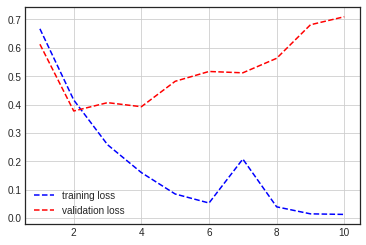

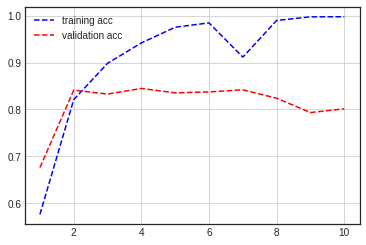

In [33]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

epochs = range(1,len(loss) +1)
plt.plot(epochs, loss, 'b--', label = 'training loss')
plt.plot(epochs, val_loss, 'r--', label = 'validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label = 'training acc')
plt.plot(epochs, val_acc, 'r--', label = 'validation acc')
plt.grid()
plt.legend()

plt.show()

### 모델 평가

In [34]:
model.evaluate(pad_x_test,y_test)

782/782 [==============================] - 8s 10ms/step - loss: 0.4902 - accuracy: 0.8588


[0.49016502499580383, 0.8587999939918518]

# GRU (Gated Recurrent Unit)
- LSTM을 더 단순하게 만든 구조

- 기억 셀은 없고, 시간방향으로 전파하는 것은 은닉 상태만 있음

- reset gate
  - 과거의 은닉 상태를 얼마나 무시할지 결정

  - $r$ 값이 결정

- update gate
  -  은닉 상태를 갱신하는 게이트  

  - LSTM의 forget, input gate 역할을 동시에 함
  
  <img src="https://miro.medium.com/max/1400/1*jhi5uOm9PvZfmxvfaCektw.png" width="500">

<sub>출처: https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21</sub>

  ### $\qquad z = \sigma (x_t W^{(z)}_x + h_{t-1} W^{(z)}_h + b^{(z)} \\ 
  \qquad r = \sigma (x_t W^{(r)}_x + h_{t-1} W^{(r)}_h + b^{(r)}) \\
  \qquad \tilde{i} = tanh (x_t W^{(i)}_x + (r \odot h_{t-1}) W^{(i)}_h + b ) \\
  \qquad h_t = (1 - z) \odot h_{t-1} + z \odot \tilde{h}$


## Reuters 데이터

- IMDB와 유사한 데이터셋(텍스트 데이터)

- 46개의 상호 배타적인 토픽으로 이루어진 데이터셋 
  - 다중 분류 문제


### 데이터셋 로드

In [1]:
from tensorflow.keras.datasets import reuters

In [3]:
num_words = 10000
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = num_words)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8982,)
(8982,)
(2246,)
(2246,)


### 데이터 전처리 및 확인

In [4]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [7]:
max_len = 300

In [8]:
pad_x_train = pad_sequences(x_train, maxlen = max_len)
pad_x_test = pad_sequences(x_test, maxlen=max_len)

In [10]:
pad_x_test[1]

array([1046,  283,   36,    8, 6607,    8,    4, 2217,   34, 9177,   13,
         10, 4910,    5,    4,  141,  283,  120,   50, 2877,    7, 1049,
         43,   10,  181,  283,  734,  115,   55, 3356,  476,    6, 2195,
         10,   73,  120,   50,   41, 6877,  169,   87, 6607,    8,  107,
        144,   23,  129,  120,  169,   87,   33, 2409,   30, 1888, 1171,
        161,    4,  294,  517,   23,    2,   25,  398,    9, 2060,  283,
         21,    4,  236,   36,    8,  143,  169,   87,  641, 1569,   28,
         69,   61,  376,  514,   90, 1249,   62,    2,   13,    4, 2217,
        696,  122,  404, 2936,   22,  134,    6,  187,  514,   10, 1249,
        107,    4,   96, 1043, 1569,   13,   10,  184,   28,   61,  376,
        514,  268,  680,    4,  320,    6,  154,    6,   69,  160,  514,
         10, 1249,   27,    4,  153,    5,   52,   29,   36,    8, 6607,
          8,  612,  408,   10, 3133,  283,   76,   27, 1504,   31,  169,
        951,    2,  122,   36,    8,  283,  236,   

### 모델 구성
- LSTM 레이어도 SimpleRNN과 같이 `return_sequences` 인자 사용가능

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense

In [13]:
model = Sequential()
model.add(Embedding(num_words, 256))
model.add(GRU(256,return_sequences=True))
model.add(GRU(128))
model.add(Dense(46,activation='softmax'))

model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 256)         2560000   
                                                                 
 gru_2 (GRU)                 (None, None, 256)         394752    
                                                                 
 gru_3 (GRU)                 (None, 128)               148224    
                                                                 
 dense (Dense)               (None, 46)                5934      
                                                                 
Total params: 3,108,910
Trainable params: 3,108,910
Non-trainable params: 0
_________________________________________________________________


### 모델 학습

In [ ]:
history = model.fit(pad_x_train,y_train,
                    batch_size = 32,
                    epochs =20,
                    validation_split=0.2)

Epoch 1/20
225/225 [==============================] - 48s 172ms/step - loss: 2.0366 - accuracy: 0.4630 - val_loss: 1.7586 - val_accuracy: 0.5298
Epoch 2/20
225/225 [==============================] - 25s 110ms/step - loss: 1.5675 - accuracy: 0.5953 - val_loss: 1.5891 - val_accuracy: 0.6043
Epoch 3/20
225/225 [==============================] - 17s 78ms/step - loss: 1.2379 - accuracy: 0.6852 - val_loss: 1.3977 - val_accuracy: 0.6617
Epoch 4/20
 22/225 [=>............................] - ETA: 20s - loss: 0.8792 - accuracy: 0.7699

### 시각화

In [ ]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

epochs = range(1,len(loss) +1)
plt.plot(epochs, loss, 'b--', label = 'training loss')
plt.plot(epochs, val_loss, 'r--', label = 'validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label = 'training acc')
plt.plot(epochs, val_acc, 'r--', label = 'validation acc')
plt.grid()
plt.legend()

plt.show()

### 모델 평가


In [ ]:
model.evaluate(pad_x_test,y_test)